In [81]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [82]:
with_mask_files = os.listdir('with_mask')
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [83]:
without_mask_files = os.listdir('without_mask')
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [84]:
len(with_mask_files) # number of mask images

3725

In [85]:
len(without_mask_files) # number of without mask images

3828

label creation

mask -> 1

no mask -> 0

In [86]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [87]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [88]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


displaying image

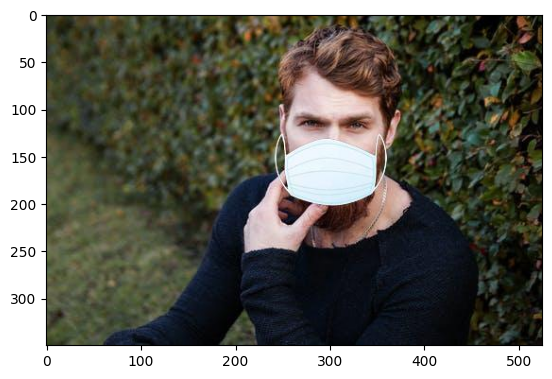

In [89]:
img = mpimg.imread('with_mask/with_mask_1.jpg')
plt.imshow(img)
plt.show()

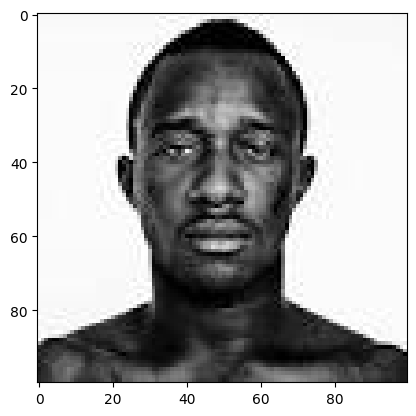

In [90]:
img = mpimg.imread('without_mask/without_mask_1.jpg')
plt.imshow(img)
plt.show()

resizing and convert into numpy

In [91]:
# with_mask_path = 'with_mask/'

# data = []

# for img_file in with_mask_files:
#   image = Image.open(with_mask_path + img_file)
#   image = image.resize((128,128))
#   image = image.convert('RGB')
#   image = np.array(image)
#   data.append(image)

# without_mask_path = 'without_mask/'

# for img_file in without_mask_files:

#   image = Image.open(without_mask_path + img_file)
#   image = image.resize((128,128))
#   image = image.convert('RGB')
#   image = np.array(image)
#   data.append(image)

In [92]:
data = np.load('numpy.npy')

In [93]:
len(data)

7553

In [94]:
X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [95]:
np.save('numpy.npy', X)

In [96]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [97]:
print(Y)

[1 1 1 ... 0 0 0]


In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [99]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3), (6042,), (1511,))

scaling images numpy aaray

In [100]:
x_train_scaled = x_train / 255

x_test_scaled = x_test / 255

In [101]:
x_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

creating CNN

In [102]:
import tensorflow as tf
from tensorflow import keras

In [103]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [104]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [105]:
model.fit(x_train_scaled, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
170/170 [==============================] - 62s 354ms/step - loss: 0.4698 - acc: 0.7975 - val_loss: 0.2698 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 54s 316ms/step - loss: 0.2891 - acc: 0.8915 - val_loss: 0.2113 - val_acc: 0.9207
Epoch 3/5
170/170 [==============================] - 55s 326ms/step - loss: 0.2204 - acc: 0.9143 - val_loss: 0.2445 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 54s 317ms/step - loss: 0.1939 - acc: 0.9240 - val_loss: 0.2152 - val_acc: 0.9372
Epoch 5/5
170/170 [==============================] - 53s 313ms/step - loss: 0.1504 - acc: 0.9430 - val_loss: 0.2437 - val_acc: 0.9388


accuracy is : 94.3%

In [106]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 4s 76ms/step - loss: 0.2062 - acc: 0.9239
Test Accuracy = 0.9238914847373962


accuracy on test data is : 92.4%

predictive model

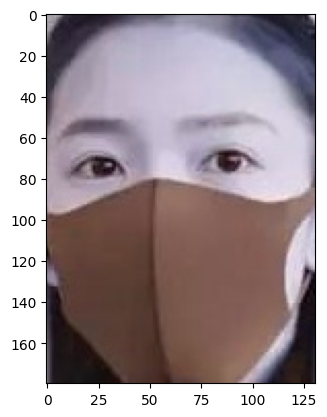

1/1 [==============================] - 0s 114ms/step
not wearing a mask


In [107]:
input_image_path = 'with_mask/with_mask_16.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('wearing a mask')
else:
  print('not wearing a mask')

In [112]:
model.save('model.h5')

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
